In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
import time

In [25]:
import numpy as np

In [3]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias

In [4]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c = 'b', s=8, label = "Training data")
    plt.scatter(test_data, test_labels, c='g', s=8, label = "Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=8, label = "Predictions")
    
    plt.legend(prop={'size':14})

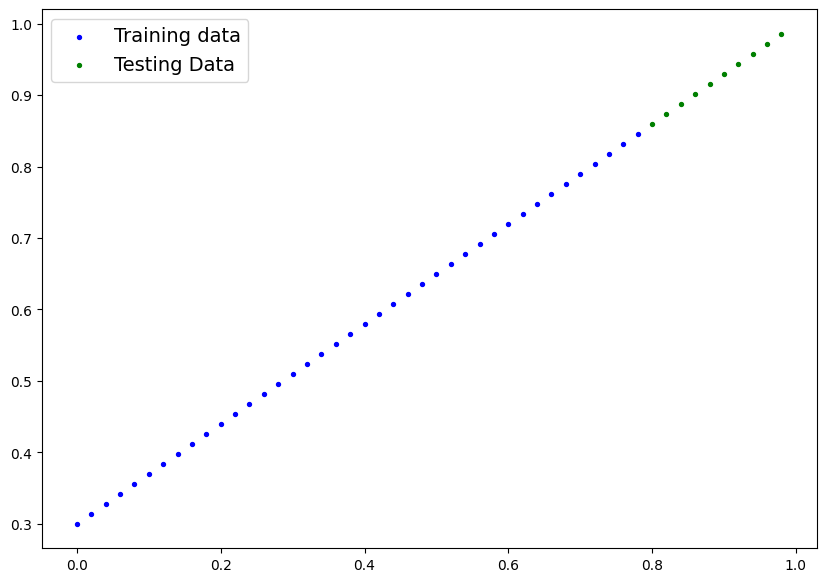

In [6]:
plot_predictions()

## Pytorch Model
Linear Regression Model

Starting with random values of weights and biases, iterate to get close to the actual slope and intercept

In [7]:

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad = True,
                                             dtype = torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [8]:
torch.manual_seed(42)

In [9]:
model_0 = LinearRegressionModel()

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

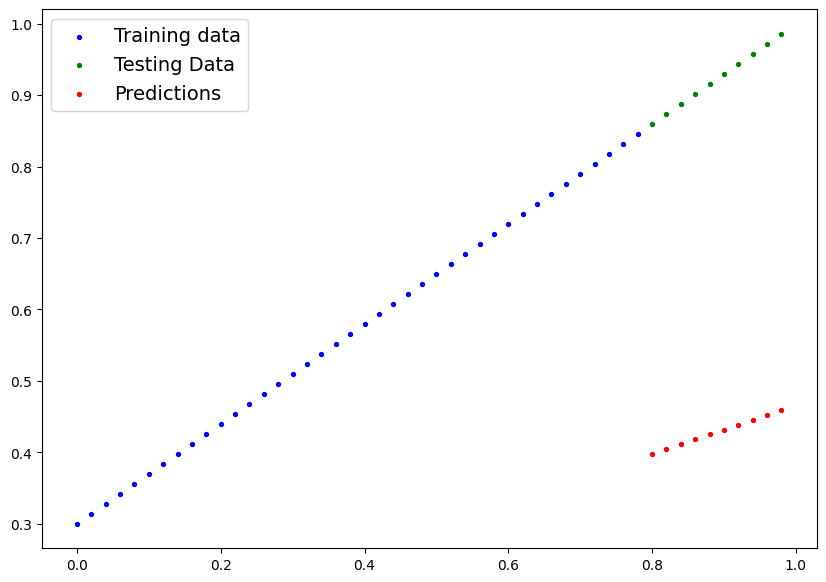

In [12]:
plot_predictions(predictions = y_preds)

## Loss Function and Optimizer

In [13]:
loss_fn = nn.L1Loss() #This is the mean absolute error loss function
#i.e. it takes the absolute distance between predicted values and test values

In [14]:
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #lr is the learning rate hyperparameter
#Stochastic gradient descent which is one of the many optimizers available under torch.optim

## Training Loop

In [15]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Setting to training mode
    model_0.train()
    # Forward pass
    y_pred = model_0(X_train)
    # Loss calcuation
    loss = loss_fn(y_pred, y_train)
    # Optimizer zero grad
    optimizer.zero_grad()
    # Backpropagation
    loss.backward()
    # Step the optimizer
    optimizer.step()
    
    # Testing, need not be done alongside the training
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch%10==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [16]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

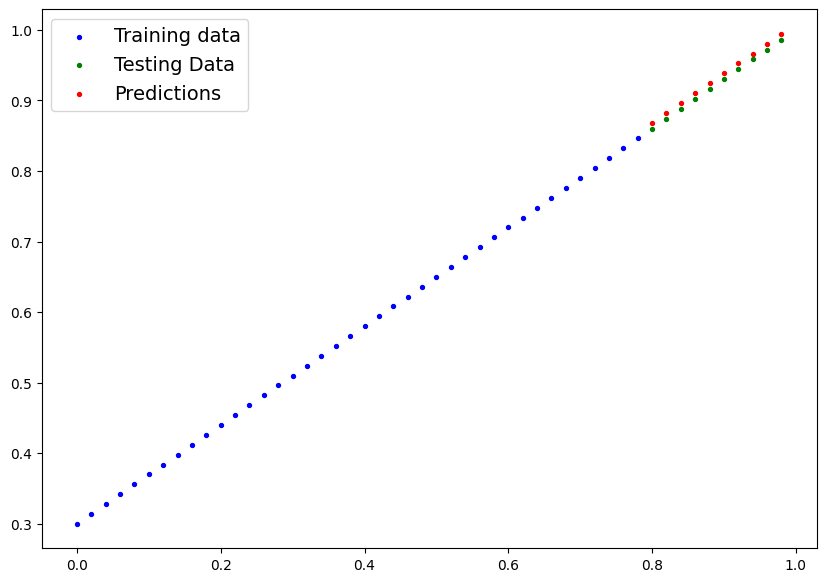

In [17]:
plot_predictions(predictions=y_preds_new)

In [18]:
model_0.state_dict()['weights'].item()

0.6990308165550232

In [19]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<L1LossBackward0>),
  tensor(0.1977, grad_fn=<L1LossBackward0>),
  tensor(0.0891, grad_fn=<L1LossBackward0>),
  tensor(0.0531, grad_fn=<L1LossBackward0>),
  tensor(0.0454, grad_fn=<L1LossBackward0>),
  tensor(0.0417, grad_fn=<L1LossBackward0>),
  tensor(0.0382, grad_fn=<L1LossBackward0>),
  tensor(0.0348, grad_fn=<L1LossBackward0>),
  tensor(0.0313, grad_fn=<L1LossBackward0>),
  tensor(0.0279, grad_fn=<L1LossBackward0>),
  tensor(0.0245, grad_fn=<L1LossBackward0>),
  tensor(0.0210, grad_fn=<L1LossBackward0>),
  tensor(0.0176, grad_fn=<L1LossBackward0>),
  tensor(0.0142, grad_fn=<L1LossBackward0>),
  tensor(0.0107, grad_fn=<L1LossBackward0>),
  tensor(0.0073, grad_fn=<L1LossBackward0>),
  tensor(0.0039, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089

## Loss Curves

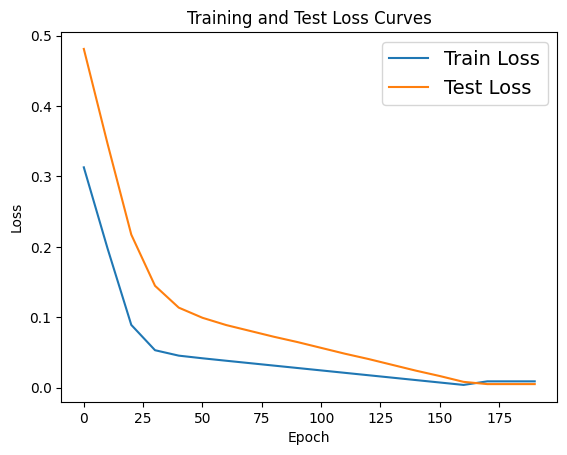

In [20]:
plt.plot(epoch_count, [tensor.item() for tensor in loss_values], label = "Train Loss")
plt.plot(epoch_count, [tensor.item() for tensor in test_loss_values], label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(prop={'size':14})

## Summarising:
1. Divide the data set into training and testing data
2. Create the NN Class inheriting from torch.nn module and with __init__function containing weights and biases with forward pass function
3. Create the NN object (model)
4. Define the loss and optimizer (gradient descent selector) functions
5. Write the training loop with the following order: Forward Pass -> Loss Calculation -> Set Gradients to Zero in Optimizer -> Backpropagation -> Step through Optimizer -> Repeat
6. Keep a track of the epoch and loss in the training loop
7. After training is completed, evaluate the model predictions on the testing data
8. Compare losses and output between training and test data